# NSL KDD Dataset Binary and Multiclass classification  

## importing of required libraries 


In [160]:
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

In [161]:
def fi(df,output,number_of_feature):
    X =df[df.columns[0:-1]]
    X=np.array(X)
    df[df.columns[-1]] = df[df.columns[-1]].astype('category')
    y=df[df.columns[-1]].cat.codes  
    
    
    
    ################## this part taken: https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
    forest.fit(X, y)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")

    temp=list(df.columns)[0:-1]
    header=[]
    for f in range(X.shape[1]):
        print("%d. feature %d %s (%f)" % (f + 1, indices[f], temp[ indices[f]] ,importances[indices[f]]))
        header.append(temp[ indices[f]])
    # Plot the impurity-based feature importances of the forest
    plt.figure(figsize=(18,10))
    plt.title(output+"   Feature importances Features Based")

    plt.bar(range(X.shape[1]), importances[indices],
            color="r", yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), header,rotation='vertical')
    plt.xlim([-1, X.shape[1]])


    graph_name=output+"_fi.pdf"
    plt.savefig(graph_name,bbox_inches='tight',format="pdf")#, dpi=400)
    plt.show()


    print("\n\n\n") 
    
    ##############################################################################################
    
    
    
    
    #FOCUSED GRAPH
   
    
    imp=[]
    for i,ii in enumerate (importances[indices]):
        imp.append(ii)
        #print(i,ii)
        if i==number_of_feature-1:break
    st=[]
    for i,ii in enumerate (std[indices]):
        st.append(ii)
        #print(i,ii)
        if i==number_of_feature-1:break
    hd=[]

    for i,ii in enumerate (header):
        hd.append(ii)
        #print(i,ii)
        if i==number_of_feature-1:break
            

    plt.figure(figsize=(18,10))
    plt.title(output+" Feature Importances Packet Feature Based")


    plt.bar(range(number_of_feature), imp,
            color="r", yerr=st, align="center")
    plt.xticks(range(number_of_feature), hd,rotation='vertical')
    plt.xlim([-1, number_of_feature])
    plt.ylabel("Importance Scores")
    #ax.set_ylim([0,2])
    plt.grid()
    graph_name=output+"fi_focused.pdf"
    plt.savefig(graph_name,bbox_inches='tight',format="pdf")#, dpi=400)
    plt.show()


    print("\n\n\n") 
    
    return imp,st,hd
            

# prepare NSL KDD dataset


## reading CSV files

In [162]:
# c_names --->  column names
c_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","labels","difficulty_degree"]

train = pd.read_csv( "data/KDDTrain+.csv", names=c_names) # train file

## deletion of unnecessary feature (difficulty_degree)

In [163]:
del train["difficulty_degree"] 

## Converting object features to categories first and then to dummy tables (except "labels")

In [164]:
for i in c_names:
    print((train[i].dtypes))
    if train[i].dtypes==object:
        train[i] = train[i].astype('category')
        if i=="labels":
            break
        train=pd.get_dummies(train, columns=[i])


int64
object
object
object
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
float64
float64
float64
float64
float64
float64
float64
int64
int64
float64
float64
float64
float64
float64
float64
float64
float64
object


# Move the labels property to the end of the dataset

In [165]:
label=train["labels"]
del train["labels"]
train["labels"]=label

In [166]:
train["labels"].unique()

['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep', ..., 'phf', 'land', 'loadmodule', 'spy', 'perl']
Length: 23
Categories (23, object): ['back', 'buffer_overflow', 'ftp_write', 'guess_passwd', ..., 'spy', 'teardrop', 'warezclient', 'warezmaster']

# What does the dataset look like?

In [167]:
train

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,labels
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,normal
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,normal
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,neptune
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,normal
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,neptune
125969,8,105,145,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,normal
125970,0,2231,384,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,normal
125971,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,neptune


# Calling the function to calculate the feature importance score

Feature ranking:
1. feature 25 same_srv_rate (0.085419)
2. feature 120 flag_SF (0.071513)
3. feature 35 dst_host_srv_serror_rate (0.066877)
4. feature 34 dst_host_serror_rate (0.066346)
5. feature 116 flag_S0 (0.057017)
6. feature 21 serror_rate (0.050598)
7. feature 22 srv_serror_rate (0.037683)
8. feature 30 dst_host_same_srv_rate (0.035117)
9. feature 29 dst_host_srv_count (0.034795)
10. feature 8 logged_in (0.034671)
11. feature 19 count (0.030033)
12. feature 32 dst_host_same_src_port_rate (0.026609)
13. feature 38 protocol_type_icmp (0.024968)
14. feature 31 dst_host_diff_srv_rate (0.024948)
15. feature 28 dst_host_count (0.024469)
16. feature 1 src_bytes (0.023991)
17. feature 33 dst_host_srv_diff_host_rate (0.023319)
18. feature 26 diff_srv_rate (0.022917)
19. feature 36 dst_host_rerror_rate (0.022167)
20. feature 90 service_private (0.021526)
21. feature 55 service_eco_i (0.019490)
22. feature 65 service_http (0.018549)
23. feature 56 service_ecr_i (0.017648)
24. feature 23 re

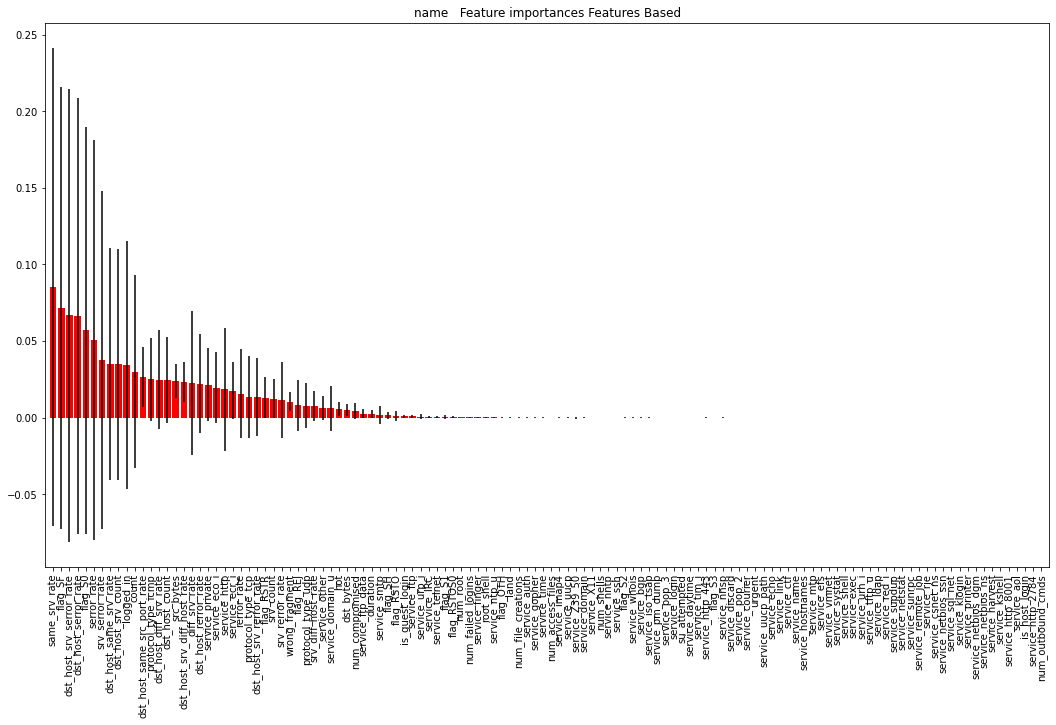

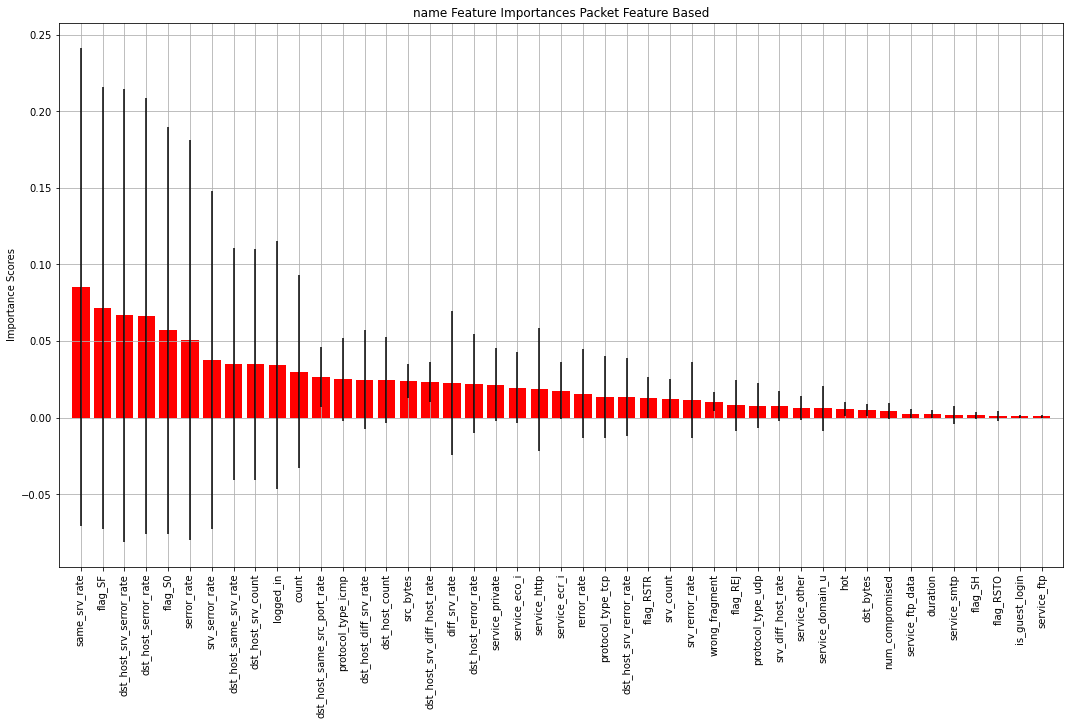

In [168]:
graph_name="name" # save graphics with this name as pdf
number_of_feature= 45 # selects the first x feature with the highest score in the focused section
imp,st,hd=fi(train,graph_name,number_of_feature)

# List of top 45 features

In [44]:
print ('%-5s %-25s %-25s %-25s' %("No","Importance Score","Standard Deviation","Feature Name"))
print ('%-5s %-25s %-25s %-25s' %("__","________________","__________________","____________"))
for i in range(len(imp)):
    print ('%-5s %-25s %-25s %-25s' %(i+1,imp[i],st[i],hd[i]))
    
    


No    Importance Score          Standard Deviation        Feature Name             
__    ________________          __________________        ____________             
1     0.08541877835459762       0.15608762847225938       same_srv_rate            
2     0.0715126329495212        0.14410100258757014       flag_SF                  
3     0.06687675746585174       0.14786516391116508       dst_host_srv_serror_rate 
4     0.066346211301629         0.14250820001379977       dst_host_serror_rate     
5     0.0570168996187475        0.13270548222467024       flag_S0                  
6     0.05059824741777188       0.13034275310379637       serror_rate              
7     0.037683440633368356      0.11001664192796141       srv_serror_rate          
8     0.035117018974980915      0.07569012892951156       dst_host_same_srv_rate   
9     0.03479502386534906       0.07558018702662714       dst_host_srv_count       
10    0.03467098639653562       0.08092480348147767       logged_in         

In [45]:
from sklearn.ensemble import ExtraTreesClassifier

In [169]:
# c_names --->  column names
c_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","labels","difficulty_degree"]

test= pd.read_csv( "data/KDDTest+.csv", names=c_names) # testfile
del test["difficulty_degree"] 
for i in c_names:
    print((test[i].dtypes))
    if test[i].dtypes==object:
        test[i] = test[i].astype('category')
        if i=="labels":
            break
        test=pd.get_dummies(test, columns=[i])
label=test["labels"]
del test["labels"]
test["labels"]=label

int64
object
object
object
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
float64
float64
float64
float64
float64
float64
float64
int64
int64
float64
float64
float64
float64
float64
float64
float64
float64
object


In [170]:
for i in test.columns:
    if i not in  train.columns:
        del test[i]

In [171]:
for i in train.columns:
    if i not in  test.columns:
        del train[i]

In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
import os
import random

In [108]:
X_train =train[train.columns[0:-1]]
y_train=train[train.columns[-1]]
y_train=np.where(y_train=="normal",0,1)

In [109]:
X_test =test[test.columns[0:-1]]
y_test=test[test.columns[-1]]
y_test=np.where(y_test=="normal",0,1)

0.7810121326751857


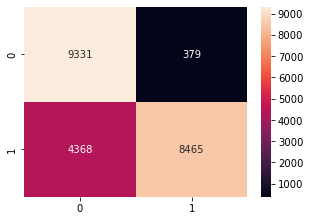

              precision    recall  f1-score   support

           0       0.68      0.96      0.80      9710
           1       0.96      0.66      0.78     12833

    accuracy                           0.79     22543
   macro avg       0.82      0.81      0.79     22543
weighted avg       0.84      0.79      0.79     22543



In [110]:
ml_list={"DT":DecisionTreeClassifier()}
clf = ml_list["DT"]
clf.fit(X_train, y_train)
y_pred =clf.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
print(f1_score(y_test, y_pred))

df_cm = pd.DataFrame(cm, index = [0,1],
          columns = [0,1])
plt.figure(figsize = (5,3.5))
sns.heatmap(df_cm, annot=True,fmt='g')

plt.show()
print(classification_report(y_test, y_pred))

In [179]:
train=train.replace({"labels": attack_dict}) 
X_train =train[train.columns[0:-1]]

y_train=train[train.columns[-1]]
y_train=y_train.astype('category')
y_train=y_train.cat.codes  

In [180]:
y_train

0         4
1         4
2         0
3         4
4         4
         ..
125968    0
125969    4
125970    4
125971    0
125972    4
Length: 125973, dtype: int8

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,labels
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,normal
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,normal
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,neptune
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,normal
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,neptune
125969,8,105,145,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,normal
125970,0,2231,384,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,normal
125971,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,neptune


In [ ]:
y_train.replace({"labels": attack_dict}) 


In [145]:
X_train

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
125969,8,105,145,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
125970,0,2231,384,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
125971,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [181]:
test=test.replace({"labels": attack_dict}) 
X_test =test[test.columns[0:-1]]

y_test=test[test.columns[-1]]
y_test=y_test.astype('category')
y_test=y_test.cat.codes  

In [182]:
y_test

0        0
1        0
2        4
3        1
4        1
        ..
22538    4
22539    4
22540    0
22541    4
22542    1
Length: 22543, dtype: int8

In [114]:
df[df.columns[-1]] = df[df.columns[-1]]
y_train=df[df.columns[-1]]

NameError: name 'df' is not defined

In [86]:
attack_dict = {
    'normal': 'normal',
    
    'back': 'DoS',
    'land': 'DoS',
    'neptune': 'DoS',
    'pod': 'DoS',
    'smurf': 'DoS',
    'teardrop': 'DoS',
    'mailbomb': 'DoS',
    'apache2': 'DoS',
    'processtable': 'DoS',
    'udpstorm': 'DoS',
    
    'ipsweep': 'Probe',
    'nmap': 'Probe',
    'portsweep': 'Probe',
    'satan': 'Probe',
    'mscan': 'Probe',
    'saint': 'Probe',

    'ftp_write': 'R2L',
    'guess_passwd': 'R2L',
    'imap': 'R2L',
    'multihop': 'R2L',
    'phf': 'R2L',
    'spy': 'R2L',
    'warezclient': 'R2L',
    'warezmaster': 'R2L',
    'sendmail': 'R2L',
    'named': 'R2L',
    'snmpgetattack': 'R2L',
    'snmpguess': 'R2L',
    'xlock': 'R2L',
    'xsnoop': 'R2L',
    'worm': 'R2L',
    
    'buffer_overflow': 'U2R',
    'loadmodule': 'U2R',
    'perl': 'U2R',
    'rootkit': 'U2R',
    'httptunnel': 'U2R',
    'ps': 'U2R',    
    'sqlattack': 'U2R',
    'xterm': 'U2R'
}


In [89]:
from sklearn.ensemble import RandomForestClassifier

0.5223447403314758


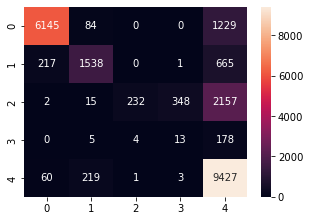

              precision    recall  f1-score   support

           0       0.96      0.82      0.89      7458
           1       0.83      0.64      0.72      2421
           2       0.98      0.08      0.16      2754
           3       0.04      0.07      0.05       200
           4       0.69      0.97      0.81      9710

    accuracy                           0.77     22543
   macro avg       0.70      0.52      0.52     22543
weighted avg       0.82      0.77      0.74     22543



In [184]:
ml_list={"DT":DecisionTreeClassifier()}
clf = ml_list["DT"]
clf.fit(X_train, y_train)
y_pred =clf.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
print(f1_score(y_test, y_pred, average='macro'))

df_cm = pd.DataFrame(cm)
plt.figure(figsize = (5,3.5))
sns.heatmap(df_cm, annot=True,fmt='g')

plt.show()
print(classification_report(y_test, y_pred))